In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_circles

import math
import statistics
from collections import Counter

In [21]:
total = pd.read_csv('./total.csv')

In [22]:
total.columns

Index(['name', 'sleepingTime', 'quality', 'dinnerTime', 'dinnerMenu', 'phone',
       'phoneTime', 'nap', 'stress', 'alcohol', 'coffee', 'caffein', 'exTime',
       'exIntensity', 'tired', 'alarm', 'alarmNum', 'nextNap', 'sleepy'],
      dtype='object')

In [23]:
total.dtypes

name             object
sleepingTime      int64
quality           int64
dinnerTime        int64
dinnerMenu        int64
phone             int64
phoneTime         int64
nap               int64
stress            int64
alcohol           int64
coffee          float64
caffein           int64
exTime            int64
exIntensity     float64
tired             int64
alarm             int64
alarmNum          int64
nextNap           int64
sleepy            int64
dtype: object

## 수면시간의 범위

In [24]:
total['sleepingTime'].max() - total['sleepingTime'].min()

802

In [25]:
total["sleepingTime"].quantile(0.75) - total["sleepingTime"].quantile(0.25)

131.0

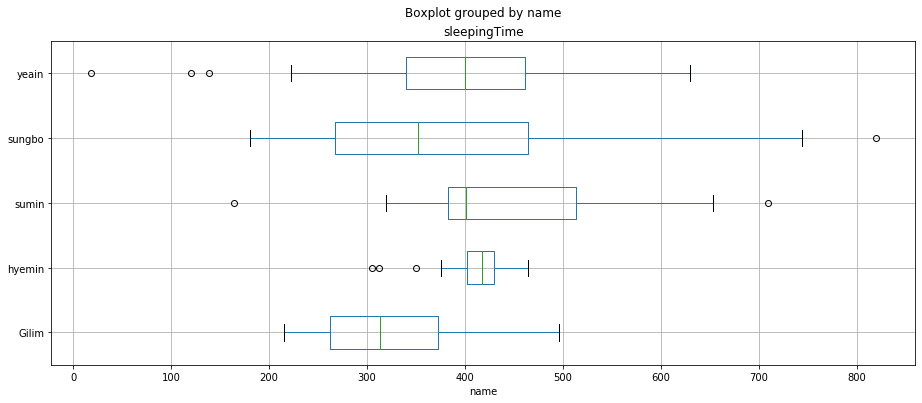

In [27]:
box = total.boxplot(column=['sleepingTime'], by='name', figsize=(15,6), vert=False)

In [29]:
box.get_figure().savefig("total_boxplot.png")

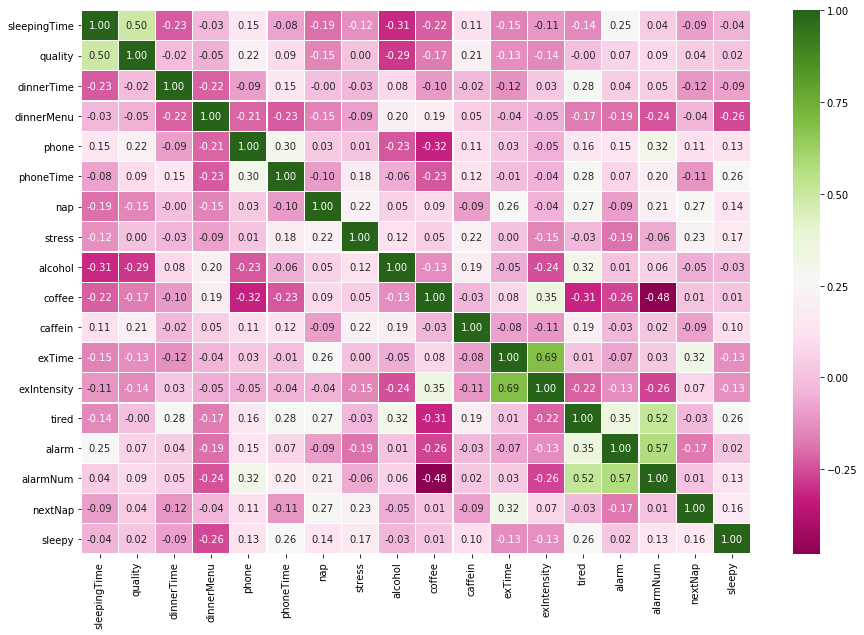

In [9]:
plt.figure(figsize=(15, 10))
heat = sns.heatmap(total.corr(), annot=True, fmt = '.2f', linewidths=0.2, cmap='PiYG')
plt.show()

In [10]:
heat.get_figure().savefig('total_heatmap.png')

In [10]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

//anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [11]:
total1 = total.loc[:, ['quality','tired']]

In [12]:
total1

,quality,tired
0,53,4
1,53,2
2,58,6
3,70,1
4,53,6
5,87,8
6,56,6
7,47,8
8,62,9
9,78,9


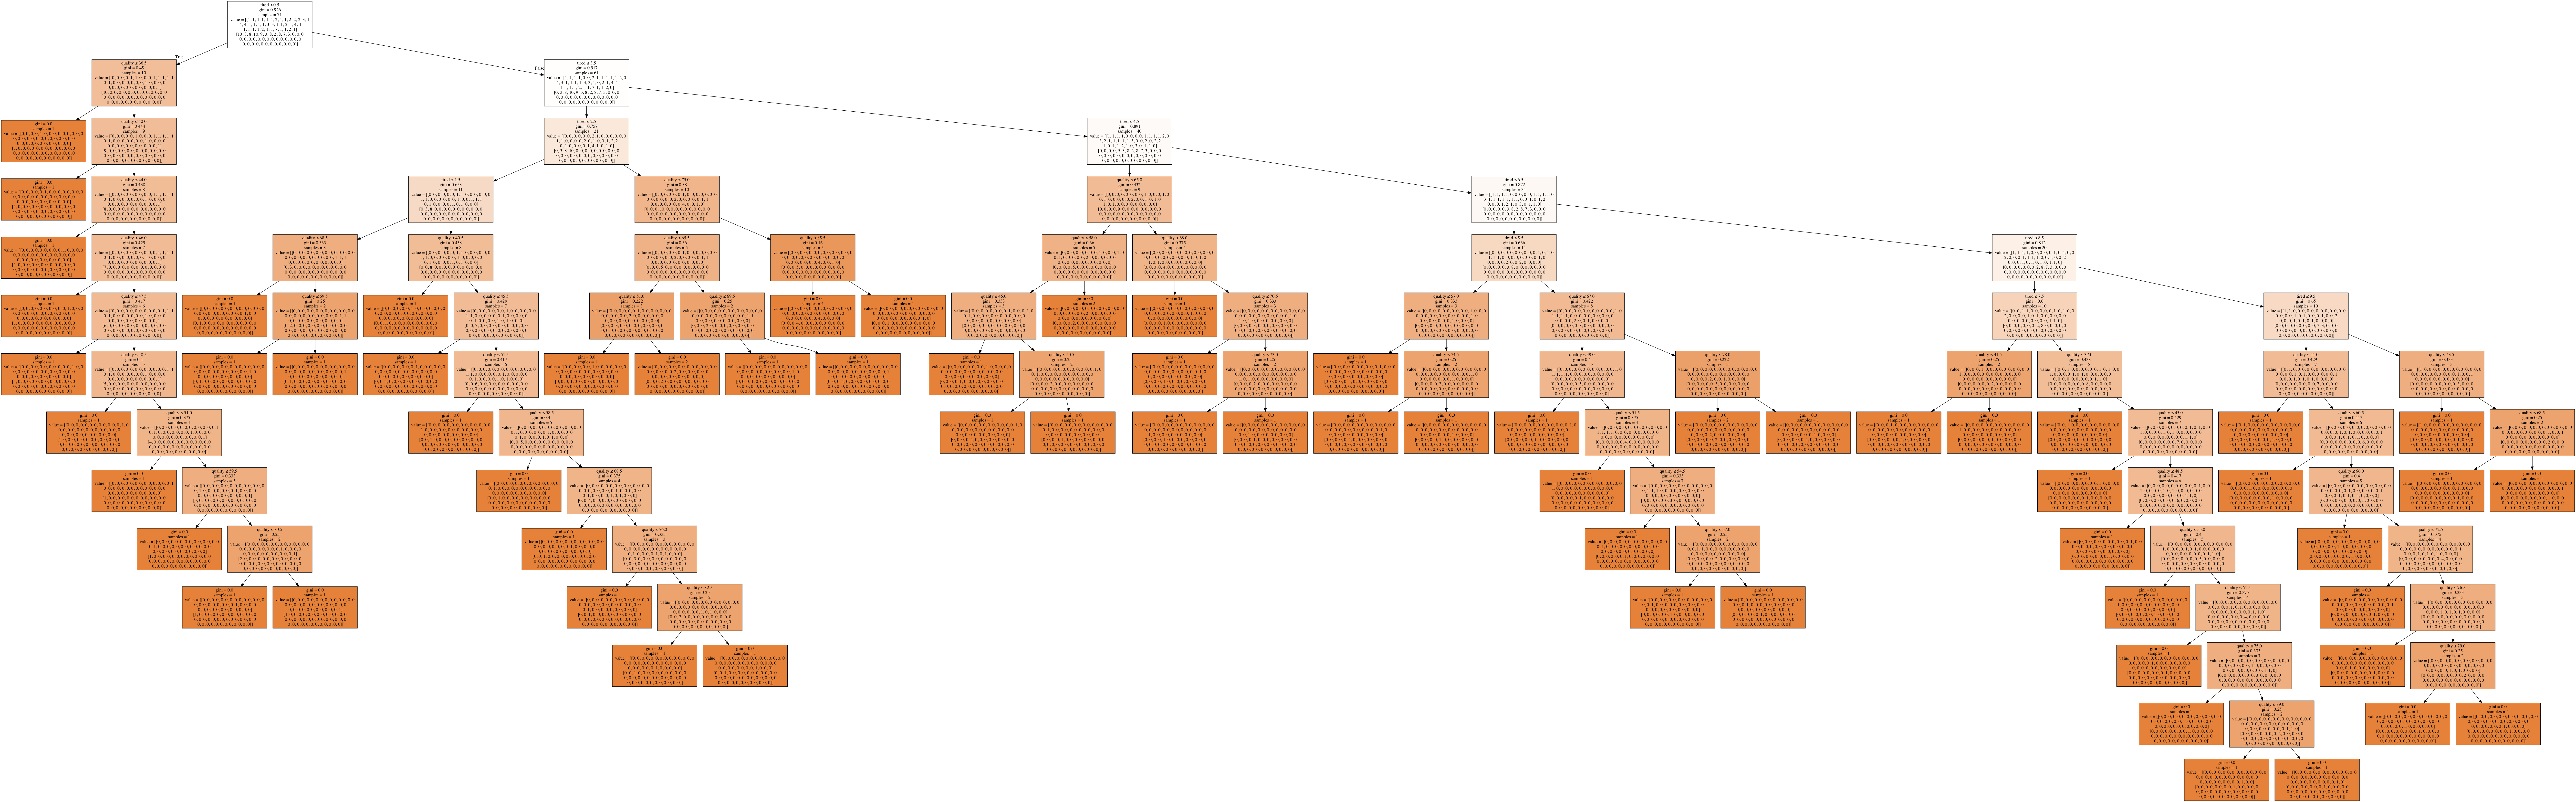

In [26]:
import sklearn.datasets as datasets
y=total1[['quality','tired']]
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
total1 = total1.fillna(0)
dtree.fit(total1, y)
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, 
                feature_names=['quality','tired'],
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

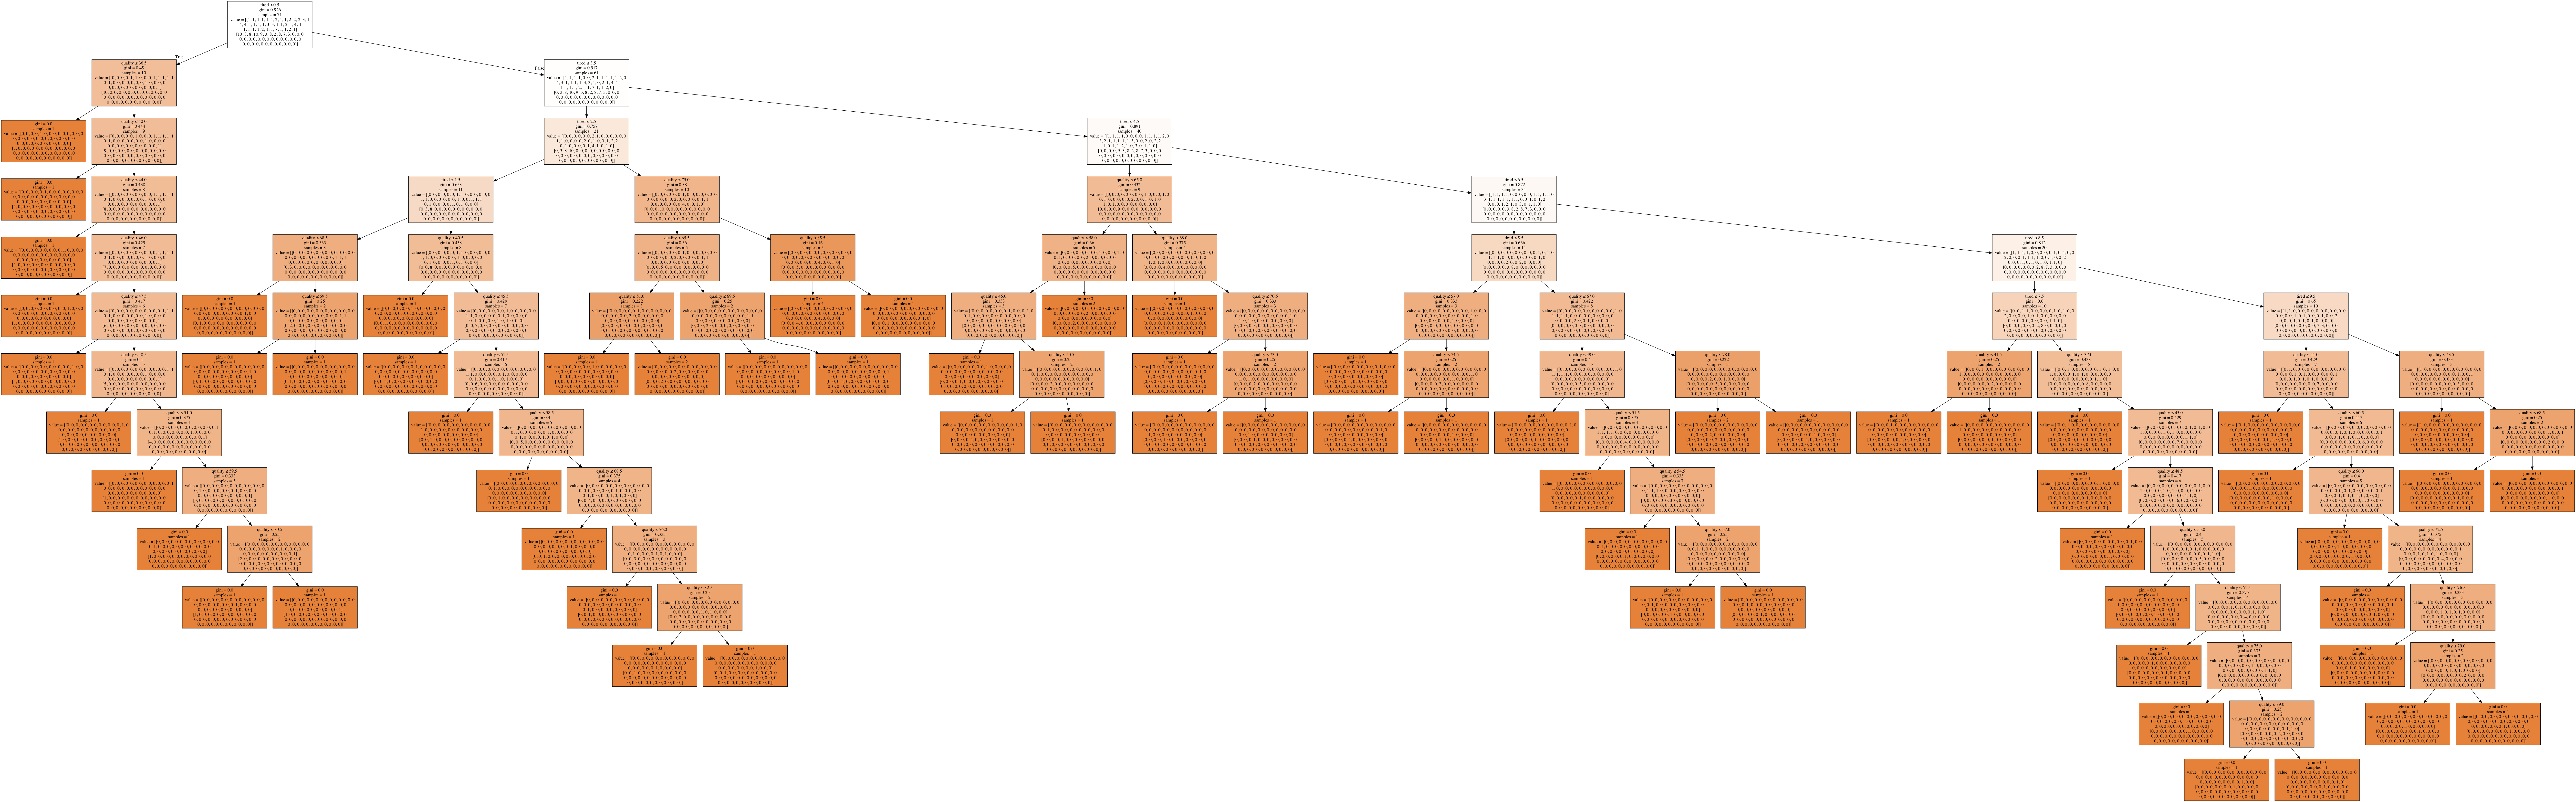

AttributeError: 'Image' object has no attribute 'get_figure'